In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [123]:
paths = [f"/Users/jankaiser/Desktop/stab_test/frame-{i:05d}.jpg" for i in range(680, 721)]
images = [cv2.imread(path, cv2.IMREAD_COLOR) for path in paths]

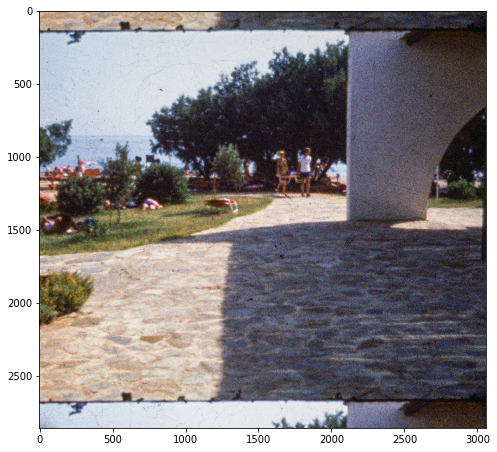

In [63]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(images[22], cv2.COLOR_BGR2RGB), interpolation="none")
plt.show()

In [7]:
pos0 = int(images[22].shape[1] / 4)
pos1 = int(images[22].shape[1] / 2)
pos2 = int(images[22].shape[1] / 4 * 3)
pos0, pos1, pos2

(764, 1529, 2293)

## Minimum or Autocorrelation

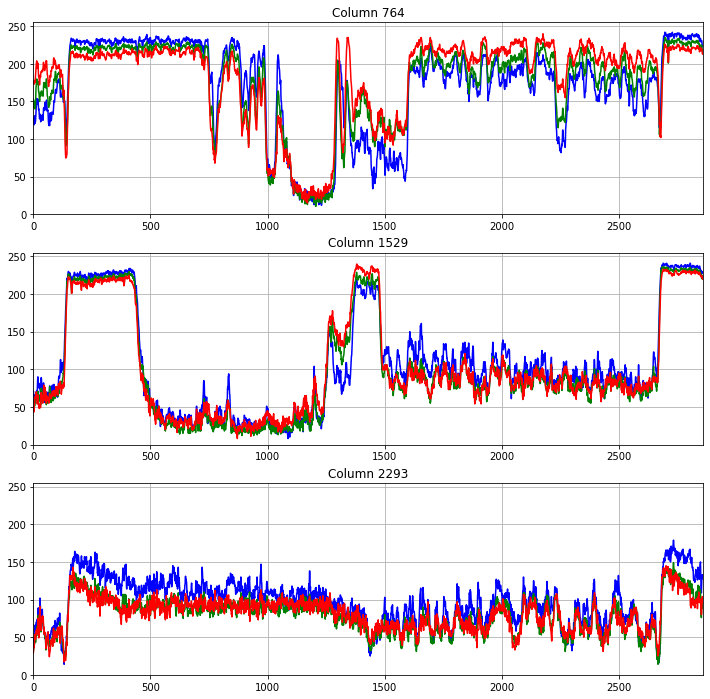

In [14]:
plt.figure(figsize=(12,12))
plt.subplot(311)
plt.title(f"Column {pos0}")
plt.plot(images[22][:,pos0,0], c="b")
plt.plot(images[22][:,pos0,1], c="g")
plt.plot(images[22][:,pos0,2], c="r")
plt.xlim(0, images[22].shape[0])
plt.ylim(0, 255)
plt.grid()
plt.subplot(312)
plt.title(f"Column {pos1}")
plt.plot(images[22][:,pos1,0], c="b")
plt.plot(images[22][:,pos1,1], c="g")
plt.plot(images[22][:,pos1,2], c="r")
plt.xlim(0, images[22].shape[0])
plt.ylim(0, 255)
plt.grid()
plt.subplot(313)
plt.title(f"Column {pos2}")
plt.plot(images[22][:,pos2,0], c="b")
plt.plot(images[22][:,pos2,1], c="g")
plt.plot(images[22][:,pos2,2], c="r")
plt.xlim(0, images[22].shape[0])
plt.ylim(0, 255)
plt.grid()
plt.show()

In [17]:
pos1val = images[22][:,pos1,1]
pos1val

array([ 56,  59,  57, ..., 225, 224, 220], dtype=uint8)

In [34]:
autocorr = np.correlate(pos1val, pos1val, mode="full")
autocorr

array([ 32, 180, 212, ..., 212, 180,  32], dtype=uint8)

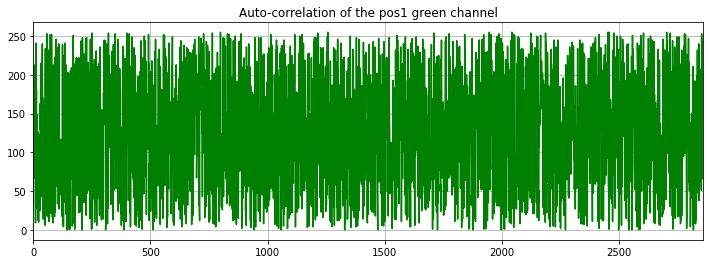

In [35]:
plt.figure(figsize=(12,4))
plt.title(f"Auto-correlation of the pos1 green channel")
plt.plot(autocorr, c="g")
plt.xlim(0, images[22].shape[0])
# plt.ylim(0, 255)
plt.grid()
plt.show()

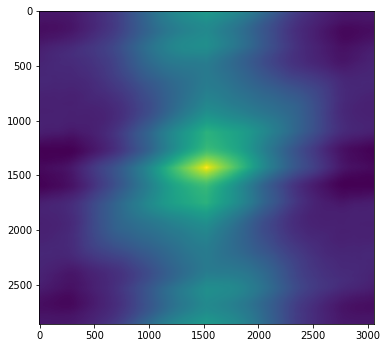

In [40]:
image_product = np.fft.fft2(images[22][:,:,1]) * np.fft.fft2(images[22][:,:,1]).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))

plt.figure(figsize=(6,6))
plt.imshow(cc_image.real, interpolation="none")
plt.show()

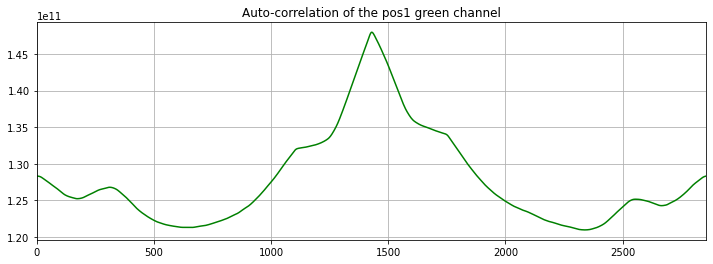

In [44]:
maxcolumn = np.unravel_index(cc_image.real.argmax(), cc_image.real.shape)[0]

plt.figure(figsize=(12,4))
plt.title(f"Auto-correlation of the pos1 green channel")
plt.plot(cc_image.real[:,maxcolumn], c="g")
plt.xlim(0, images[22].shape[0])
# plt.ylim(0, 255)
plt.grid()
plt.show()

## Edge Detection

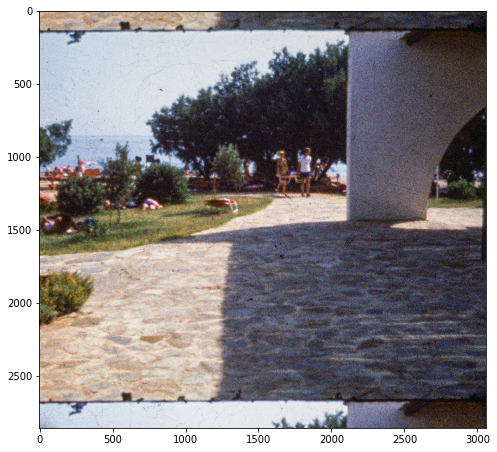

In [64]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(images[22], cv2.COLOR_BGR2RGB), interpolation="none")
plt.show()

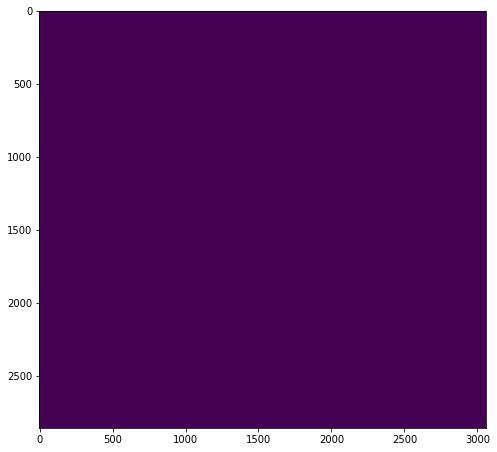

In [62]:
bw = cv2.cvtColor(images[22], cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(bw, (3,3), 0)
edges = cv2.Canny(image=blurred, threshold1=190, threshold2=1000)

plt.figure(figsize=(8,8))
plt.imshow(edges, interpolation="none")
plt.show()

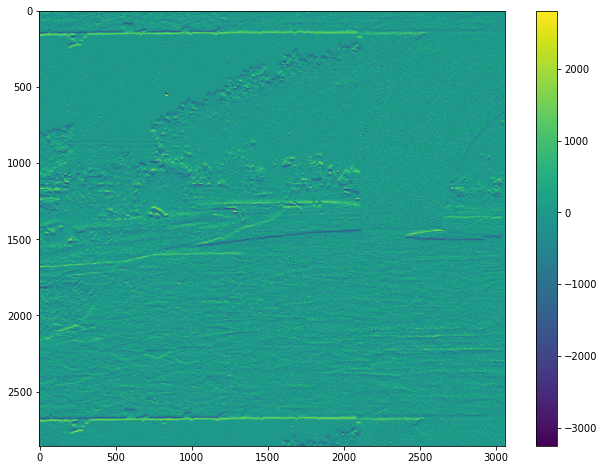

In [68]:
sobely = cv2.Sobel(src=blurred, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

plt.figure(figsize=(11,8))
plt.imshow(sobely, interpolation="none")
plt.colorbar()
plt.show()

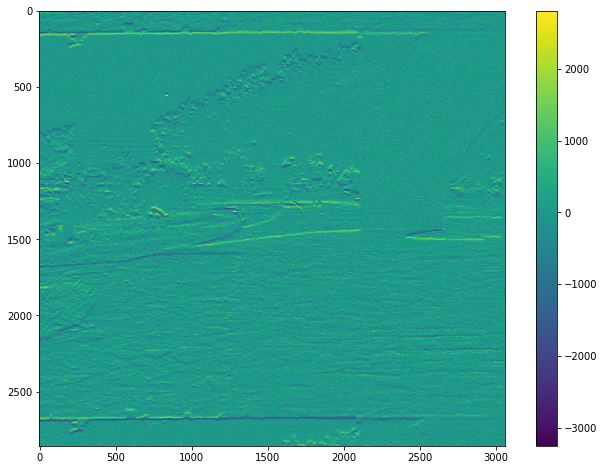

In [69]:
flippedsobely = sobely.copy()
flippedsobely[int(flippedsobely.shape[0]/2):] = -flippedsobely[int(flippedsobely.shape[0]/2):]

plt.figure(figsize=(11,8))
plt.imshow(flippedsobely, interpolation="none")
plt.colorbar()
plt.show()

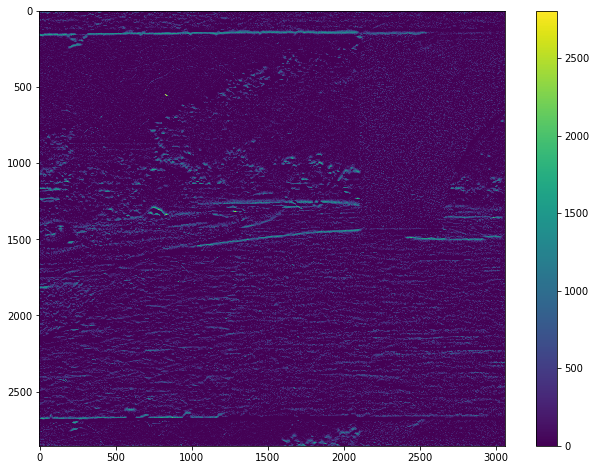

In [74]:
clippedsobely = flippedsobely.clip(0, None)

plt.figure(figsize=(11,8))
plt.imshow(clippedsobely, interpolation="none")
plt.colorbar()
plt.show()

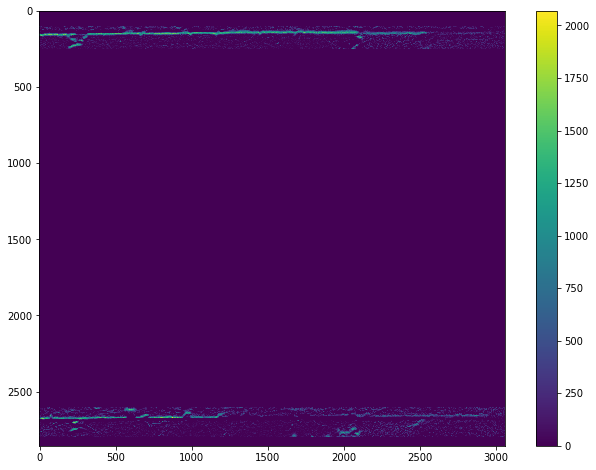

In [76]:
zeroedsobely = np.zeros_like(clippedsobely)
zeroedsobely[100:250] = clippedsobely[100:250]
zeroedsobely[2600:2800] = clippedsobely[2600:2800]

plt.figure(figsize=(11,8))
plt.imshow(zeroedsobely, interpolation="none")
plt.colorbar()
plt.show()

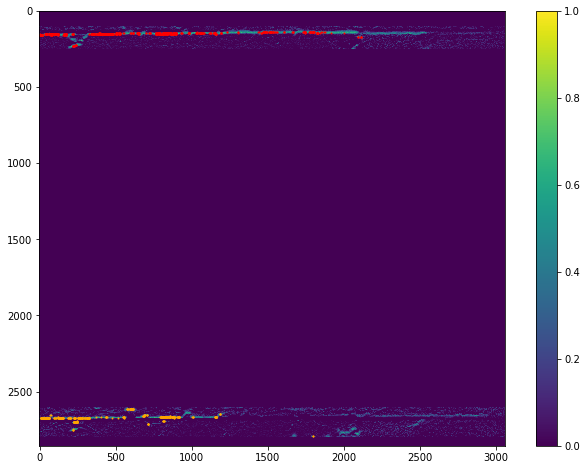

In [114]:
upperpts = np.argwhere(zeroedsobely[100:250] > 1500)
upperpts[:,0] += 100

lowerpts = np.argwhere(zeroedsobely[2600:2800] > 1500)
lowerpts[:,0] += 2600

plt.figure(figsize=(11,8))
plt.imshow(zeroedsobely, interpolation="none")
plt.scatter(upperpts[:,1], upperpts[:,0], s=1, c="red")
plt.scatter(lowerpts[:,1], lowerpts[:,0], s=1, c="orange")
plt.colorbar()
plt.show()

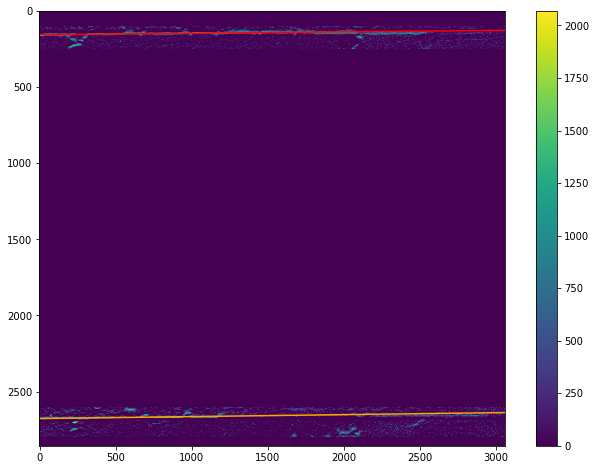

In [117]:
um, ub = np.polyfit(upperpts[:,1], upperpts[:,0], 1)
upperlinex = np.arange(zeroedsobely.shape[1])
upperliney = um * upperlinex + ub
lm, lb = np.polyfit(lowerpts[:,1], lowerpts[:,0], 1)
lowerlinex = np.arange(zeroedsobely.shape[1])
lowerliney = lm * lowerlinex + lb

plt.figure(figsize=(11,8))
plt.imshow(zeroedsobely, interpolation="none")
plt.plot(upperlinex, upperliney, c="red")
plt.plot(lowerlinex, lowerliney, c="orange")
plt.colorbar()
plt.show()

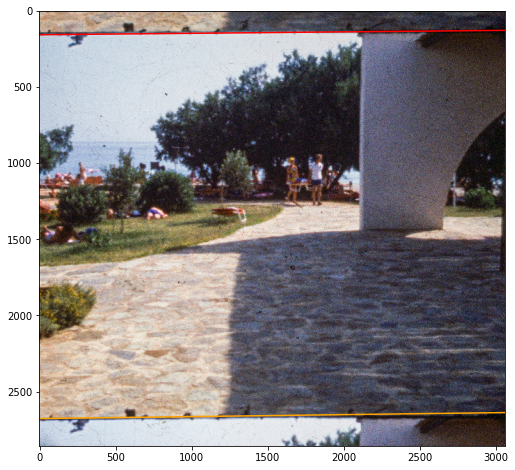

In [121]:
um, ub = np.polyfit(upperpts[:,1], upperpts[:,0], 1)
upperlinex = np.arange(zeroedsobely.shape[1])
upperliney = um * upperlinex + ub
lm, lb = np.polyfit(lowerpts[:,1], lowerpts[:,0], 1)
lowerlinex = np.arange(zeroedsobely.shape[1])
lowerliney = lm * lowerlinex + lb

plt.figure(figsize=(11,8))
plt.imshow(cv2.cvtColor(images[22], cv2.COLOR_BGR2RGB), interpolation="none")
plt.plot(upperlinex, upperliney, c="red")
plt.plot(lowerlinex, lowerliney, c="orange")
plt.show()

In [120]:
np.mean([ub, lb])

1416.6657357718802

In [130]:
def vertical_frame_position(image):
    bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(bw, (3,3), 0)
    sobely = cv2.Sobel(src=blurred, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

    upperpts = np.argwhere(sobely[100:250] > 1500)
    upperpts[:,0] += 100
    lowerpts = np.argwhere(sobely[2600:2800] < -1500)
    lowerpts[:,0] += 2600

    _, ub = np.polyfit(upperpts[:,1], upperpts[:,0], 1)
    _, lb = np.polyfit(lowerpts[:,1], lowerpts[:,0], 1)  

    pos = np.mean([ub, lb])
    
    return pos

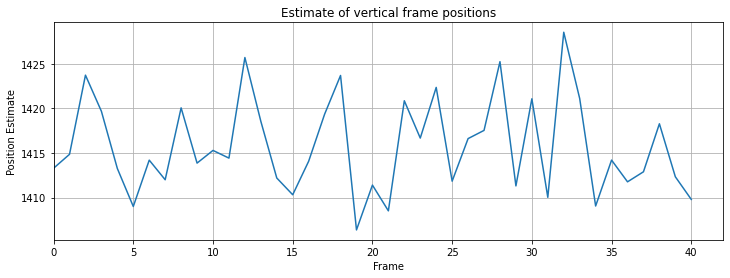

In [131]:
vpositions = [vertical_frame_position(image) for image in images]

plt.figure(figsize=(12,4))
plt.title(f"Estimate of vertical frame positions")
plt.plot(vpositions)
plt.xlabel("Frame")
plt.ylabel("Position Estimate")
plt.xlim(0, None)
plt.grid()
plt.show()

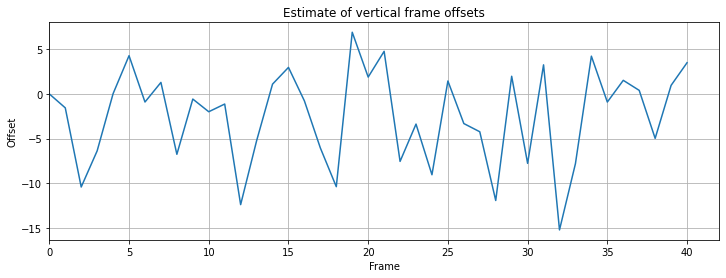

In [133]:
voffsets = vpositions[0] - vpositions

plt.figure(figsize=(12,4))
plt.title(f"Estimate of vertical frame offsets")
plt.plot(voffsets)
plt.xlabel("Frame")
plt.ylabel("Offset")
plt.xlim(0, None)
plt.grid()
plt.show()

In [134]:
dpaths = [f"/Users/jankaiser/Desktop/stab_test/offset_frame-{i:05d}.jpg" for i in range(680, 721)]
for offset, image, path in zip(voffsets, images, dpaths):
    M = np.float32([[1, 0, 0], [0, 1, offset]])
    translated = cv2.warpAffine(image, M, (image.shape[1],image.shape[0]))
    cv2.imwrite(path, translated)